In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import tensorflow.keras.utils as np_utils
import random

In [2]:
num_patterns = 200
num_features = 2
num_classes = 2
mu, sigma = 0, 0.5

Xred = np.random.normal(mu, sigma, (num_patterns, num_features)) + np.array([0.5, 0.5])
Yred = np.zeros(num_patterns, dtype=int)
Xblue = np.random.normal(mu, sigma,(num_patterns, num_features)) + np.array([-0.5, -0.5])
Yblue = np.ones(num_patterns, dtype=int) * 1
X = np.concatenate((Xred, Xblue), axis=0)
num_patterns = num_patterns * num_classes
Y = np.concatenate((Yred, Yblue), axis=0)

#standarize
Y_hot = np.zeros((Y.size, Y.max()+1))
Y_hot[np.arange(Y.size),Y] = 1
Y = np.reshape(Y, (-1,1))


(400, 2)


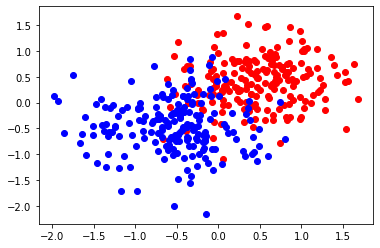

In [3]:
print(X.shape)
plt.scatter(X[0:int(num_patterns/2),0], X[0:int(num_patterns/2),1], color='red')
plt.scatter(X[int(num_patterns/2): int(2*num_patterns/2),0], X[int(num_patterns/2): int(2*num_patterns/2),1], color='blue')

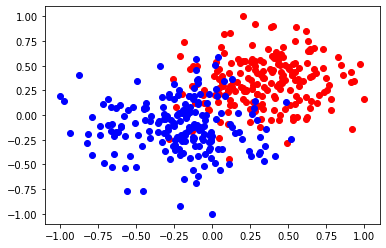

In [4]:
X = 2*((X - X.min(0)) / X.ptp(0)) -1
plt.scatter(X[0:int(num_patterns/2),0], X[0:int(num_patterns/2),1], color='red')
plt.scatter(X[int(num_patterns/2): int(2*num_patterns/2),0], X[int(num_patterns/2): int(2*num_patterns/2),1], color='blue')

In [5]:
percent = 0.8
n = int(percent * num_patterns) 
indexes = [i for i in range(num_patterns)]
random.shuffle(indexes)

index_train = indexes[0:n]
index_test = indexes[n::]

y_train = Y[index_train, :]
y_test = Y[index_test, :]
X_train = X[index_train, :]
X_test = X[index_test, :]

batch_size = 10
epochs = 50

def build_logistic_model(input_dim, output_dim):
    model = Sequential()
    model.add(Dense(output_dim, input_dim=num_features, activation='softmax'))

    return model

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

model = build_logistic_model(num_features, num_classes)

model.summary()

# compile the model
model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, Y_train,
                    batch_size=batch_size, epochs=epochs,
                    verbose=1, validation_data=(X_test, Y_test))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
Total params: 6
Trainable params: 6
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
32/32 [==============================] - 1s 21ms/step - loss: 0.9474 - accuracy: 0.1063 - val_loss: 0.9541 - val_accuracy: 0.1000
Epoch 2/50
32/32 [==============================] - 0s 4ms/step - loss: 0.9121 - accuracy: 0.1125 - val_loss: 0.9158 - val_accuracy: 0.1000
Epoch 3/50
32/32 [==============================] - 0s 6ms/step - loss: 0.8792 - accuracy: 0.1187 - val_loss: 0.8799 - val_accuracy: 0.0875
Epoch 4/50
32/32 [==============================] - 0s 5ms/step - loss: 0.8484 - accuracy: 0.1156 - val_loss: 0.8466 - val_accuracy: 0.1000
Epoch 5/50
32/32 [==============================] - 0s 4ms/step - loss: 0.8197 - accuracy: 0.11

In [6]:
model.predict(X_test)
pred = model.predict(np.array(X_test))
predictions = np.argmax(pred, axis=-1)

inference = np.concatenate((np.reshape(pred, (-1,num_classes)), np.reshape(predictions, (-1,1)), y_test), axis=1)
inference_sorted = np.array(sorted(inference, key=lambda a_entry: 1.0/a_entry[1]))
print(inference_sorted)
num_test_patterns = inference_sorted.shape[0]


[[0.06577739 0.93422258 1.         1.        ]
 [0.06668928 0.93331075 1.         1.        ]
 [0.0822195  0.91778046 1.         1.        ]
 [0.08232928 0.91767073 1.         1.        ]
 [0.09471645 0.90528351 1.         1.        ]
 [0.09714137 0.90285867 1.         1.        ]
 [0.10473212 0.89526784 1.         1.        ]
 [0.12216244 0.8778376  1.         1.        ]
 [0.14198184 0.8580181  1.         1.        ]
 [0.14238711 0.85761285 1.         1.        ]
 [0.17279494 0.82720506 1.         1.        ]
 [0.1742909  0.82570904 1.         1.        ]
 [0.21029156 0.78970838 1.         1.        ]
 [0.21121328 0.78878671 1.         1.        ]
 [0.22801028 0.77198964 1.         1.        ]
 [0.23537858 0.76462144 1.         1.        ]
 [0.24022834 0.7597717  1.         1.        ]
 [0.24024953 0.75975043 1.         1.        ]
 [0.24052174 0.75947833 1.         1.        ]
 [0.24216262 0.75783736 1.         1.        ]
 [0.26552761 0.73447245 1.         1.        ]
 [0.27025989 

P_target         is the real amount of positives  
N_target         is the real amount of negatives  
P_predicted      is the amount of positives predicted  
N_predicted      is the amount of negatives predicted

In [7]:
P_target = np.sum(y_test)
N_target = num_test_patterns - P_target

# At the beggining of ROC contruction all patterns are predicted as false because the thresold is maximun

TP = 0              #labeled 1  predicted 1
FN = P_target       #labeled 1  predicted 0
FP = 0              #labeled 0  predicted 1 
TN = N_target       #labeled 1 predicted 0

x = []
y = []

TPR = TP/(TP + FN)
FPR = FP/(FP + TN)
x.append(FPR)
y.append(TPR)

target = inference_sorted[:, 3]
predicted = inference_sorted[:, 2]
for i in range(num_test_patterns):

    if(target[i] == 1):
        TP += 1
        FN -= 1
    else:
        TN -= 1
        FP += 1
    
    TPR = TP/(TP + FN)
    FPR = FP/(FP + TN)
    x.append(FPR)
    y.append(TPR)



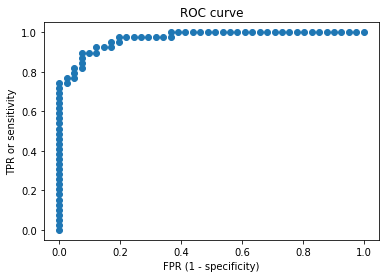

In [8]:
fig, ax = plt.subplots()
plt.title('ROC curve')
ax.set_ylabel('TPR or sensitivity') 
ax.set_xlabel('FPR (1 - specificity)') 
plt.scatter(x, y)

In [9]:
AUC = 0
for i in range(2, num_test_patterns):
    AUC += (x[i] - x[i-1])*(y[i] + y[i-1])/2

print(AUC)

0.9449656035021888
